## **Bangalore House Price prediction :**
* What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

* Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

## Lifecycle of the project :
1. Data and Library Import
2. Data Understanding and Cleaning
3. Data Visualization and some insights

4. Train-Test split and Model Building
5. Tuning and Model Finalization
6. Conclusion


## 1. Data and Library Import

In [1]:
# Basic Library Import :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignoring the warnings :
import warnings
warnings.filterwarnings("ignore")

## 2. Data Understanding and Cleaning

In [ ]:
data_path = 'Bengaluru_House_Data.csv'
data = pd.read_csv(data_path)

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for column in data.columns:
  print(data[column].value_counts())
  print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK        

In [7]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
data.drop(columns = ['area_type','availability','society','balcony'],inplace=True)

In [9]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
# Data cleaning :
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [12]:
data['location'] = data['location'].fillna('Sarjapur  Road')

In [13]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [14]:
data['size'] = data['size'].fillna('2 BHK')

In [15]:
data['bath'] = data['bath'].fillna(data['bath'].median())

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [17]:
data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [18]:
data[data.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [19]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def convertRange(x):
  temp = x.split('-')
  if len(temp)==2:
    return (float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [21]:
data['total_sqft']=data['total_sqft'].apply(convertRange)

In [22]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
# Price per square Feet :
data['Price_per_square_feet'] = data['price']*100000 / data['total_sqft']

In [24]:
data['Price_per_square_feet']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: Price_per_square_feet, Length: 13320, dtype: float64

In [25]:
data.describe()

,total_sqft,bath,price,bhk,Price_per_square_feet
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [26]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    400
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [27]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_count = data['location'].value_counts()

In [28]:
location_count

Whitefield                        541
Sarjapur  Road                    400
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [29]:
location_count_less_10 = location_count[location_count<10]
location_count_less_10

Vishwanatha Nagenahalli           9
Chennammana Kere                  9
2nd Phase JP Nagar                9
Jakkur Plantation                 9
B Narayanapura                    9
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: location, Length: 1040, dtype: int64

In [30]:
data['location'] = data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [31]:
data['location'].value_counts()

other                  2755
Whitefield              541
Sarjapur  Road          400
Electronic City         304
Kanakpura Road          273
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: location, Length: 255, dtype: int64

In [32]:
# Outlier detection and Removal :
data.describe()

,total_sqft,bath,price,bhk,Price_per_square_feet
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [33]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [34]:
data = data[((data['total_sqft']/data['bhk'])>=300)]
data.describe()

,total_sqft,bath,price,bhk,Price_per_square_feet
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [35]:
data.shape

(12530, 7)

In [36]:
data.Price_per_square_feet.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_square_feet, dtype: float64

In [37]:
def remove_outliers_sqft(df):
  df_output = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.Price_per_square_feet)
    st = np.std(subdf.Price_per_square_feet)

    gen_df = subdf[(subdf.Price_per_square_feet > (m-st))&(subdf.Price_per_square_feet <= (m+st))]
    df_output = pd.concat([df_output,gen_df],ignore_index = True)
  return df_output
data = remove_outliers_sqft(data)

In [38]:
data.describe()

,total_sqft,bath,price,bhk,Price_per_square_feet
count,10282.000000,10282.000000,10282.000000,10282.000000,10282.000000
mean,1509.996956,2.474032,91.718675,2.576347,5669.007067
std,883.210082,0.986908,88.327858,0.900592,2292.794131
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4249.917219
50%,1286.000000,2.000000,67.000000,2.000000,5176.565008
75%,1650.000000,3.000000,100.000000,3.000000,6431.808627
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [39]:
# BHK Outliers :
def bhk_outlier_remove(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.Price_per_square_feet)
          ,'std':np.std(bhk_df.Price_per_square_feet)
          ,'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.Price_per_square_feet<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [40]:
data = bhk_outlier_remove(data)

In [41]:
data.shape

(10282, 7)

In [42]:
data.head(5)

,location,size,total_sqft,bath,price,bhk,Price_per_square_feet
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [43]:
drop_col = ['size','Price_per_square_feet']
data.drop(drop_col,axis=1,inplace=True)

**Outliers are now removed and the data is clean**

In [44]:
data.to_csv('Cleaned_data.csv')

## 3. Visualization and Insights

In [45]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    10282 non-null  object 
 1   total_sqft  10282 non-null  float64
 2   bath        10282 non-null  float64
 3   price       10282 non-null  float64
 4   bhk         10282 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 401.8+ KB


In [47]:
# Only 1 categorical column = 'location'
cat_col = ['location']
data['location'].nunique()

255

In [48]:
# data['location'].unique()
data['location'].value_counts()

other                   2205
Whitefield               484
Sarjapur  Road           306
Electronic City          279
Kanakpura Road           196
                        ... 
Vishwapriya Layout         4
HAL 2nd Stage              4
Vishveshwarya Layout       4
Marsur                     3
BTM 1st Stage              3
Name: location, Length: 255, dtype: int64

<Axes: xlabel='count', ylabel='bath'>

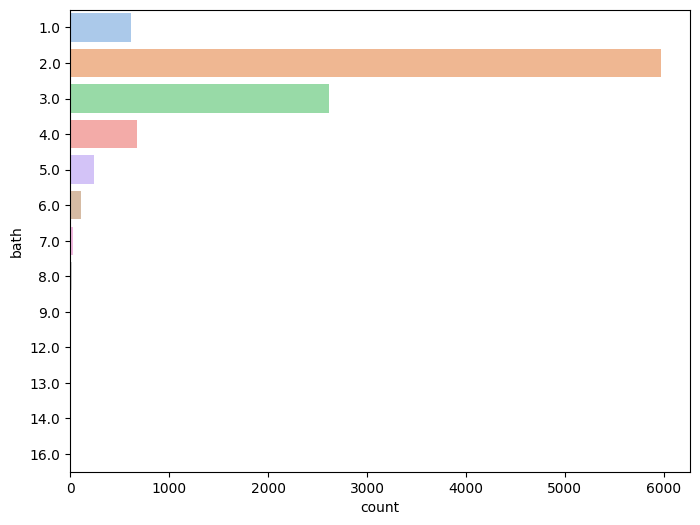

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data,y='bath',palette = 'pastel')

<Axes: xlabel='count', ylabel='bhk'>

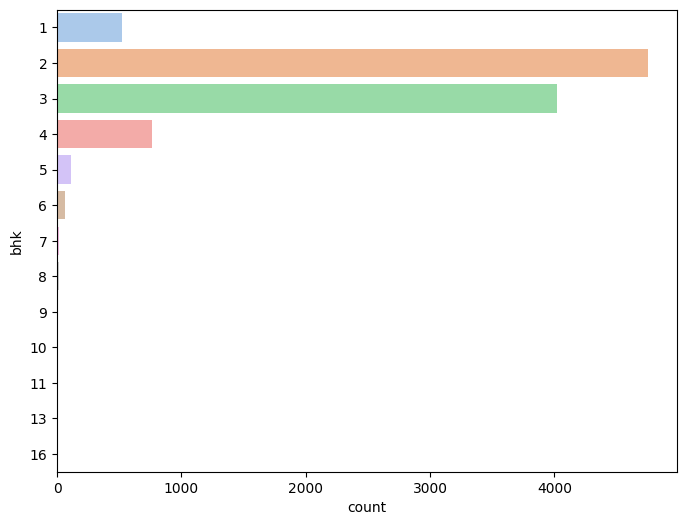

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data,y='bhk',palette = 'pastel')

<Axes: xlabel='price', ylabel='Density'>

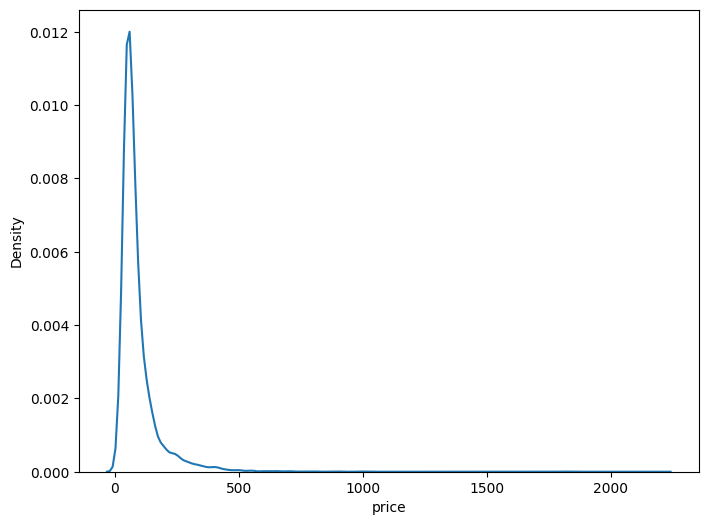

In [51]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data,x='price',palette = 'pastel')

<Axes: xlabel='price'>

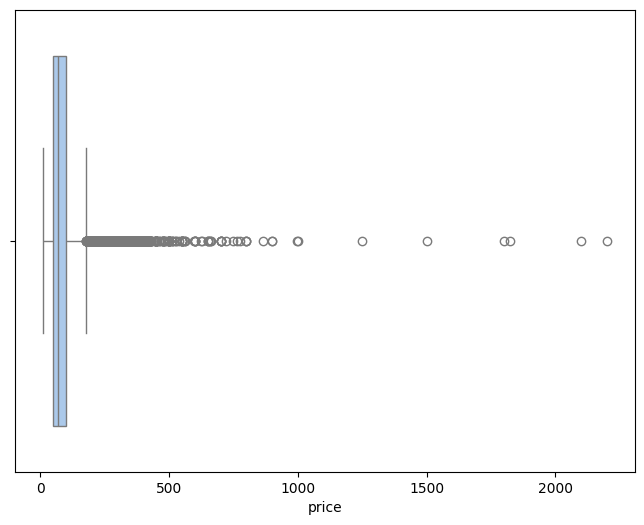

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data,x='price',palette = 'pastel')

<Axes: xlabel='total_sqft', ylabel='Density'>

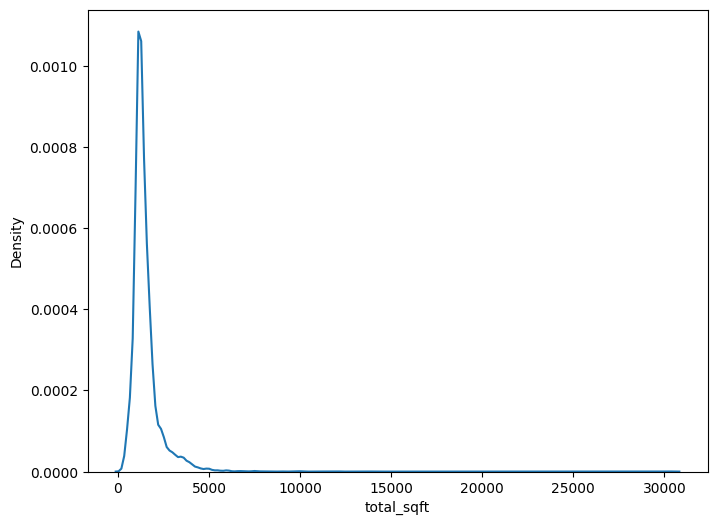

In [53]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data,x='total_sqft',palette = 'pastel')

<Axes: xlabel='total_sqft'>

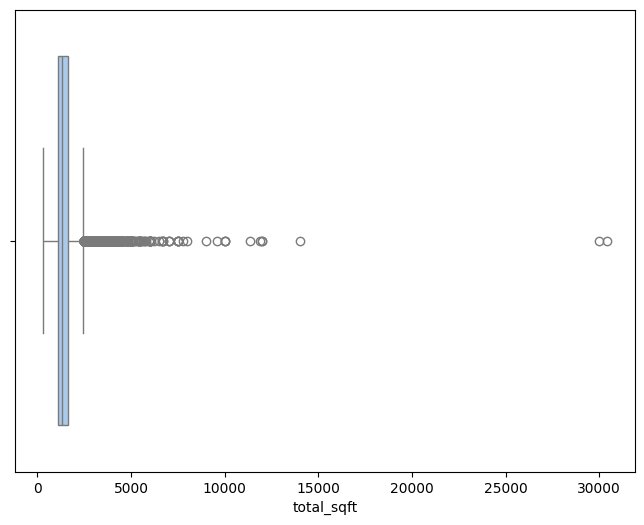

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data,x='total_sqft',palette = 'pastel')

<Figure size 800x600 with 0 Axes>

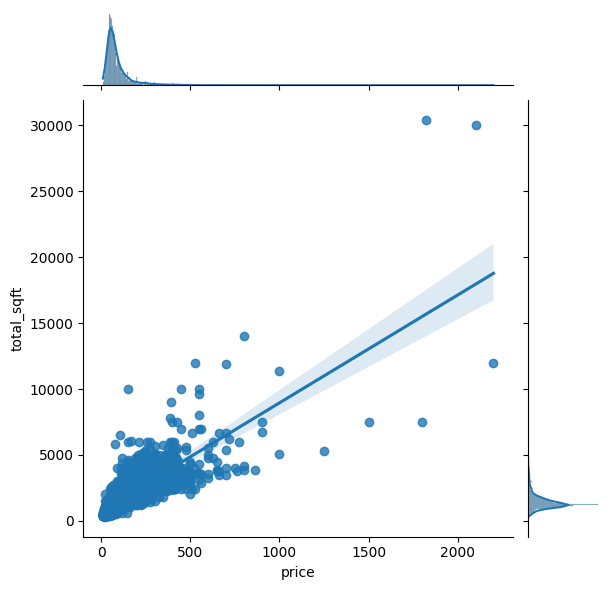

In [55]:
# Plot between total_sqft and price:
plt.figure(figsize=(8, 6))
sns.jointplot(data=data,y='total_sqft',x='price',kind='reg')

**Insights :**
* *Most sold house are of 2BHK*
* *Houses mainly in 254 different locations but most in Whitefield and Sarjapur Road*

## 4. Train-Test Split and Model Building :

In [56]:
# Importing Bsic libraries for ML model in Pipelining
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [57]:
X = data.drop(columns=['price'])
y = data['price']

In [58]:
# Train and Test Split :
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
print(X_train.shape)
print(X_test.shape)

(8225, 4)
(2057, 4)


In [60]:
# Applying Linear Regression :
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [61]:
scaler = StandardScaler()

In [62]:
lr = LinearRegression()

In [63]:
pipe = make_pipeline(column_trans,scaler,lr)

In [64]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [65]:
y_pred = pipe.predict(X_test)

In [66]:
r2_score(y_test,y_pred)

0.8211422469023653

In [67]:
# Applying Lasso :
lasso = Lasso()

In [68]:
pipe = make_pipeline(column_trans,scaler,lasso)

In [69]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [70]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.807562263182884

In [71]:
# Applying Ridge :
ridge = Ridge()

In [72]:
pipe = make_pipeline(column_trans,scaler,ridge)

In [73]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [74]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.821200847230972

In [75]:
# Comparing the best models :
print("No Regularization : ",r2_score(y_test,y_pred))
print("Lasso Regularization : ",r2_score(y_test,y_pred_lasso))
print("Ridge Regularization : ",r2_score(y_test,y_pred_ridge))

No Regularization :  0.8211422469023653
Lasso Regularization :  0.807562263182884
Ridge Regularization :  0.821200847230972


In [76]:
# Making a Pickle File :
import pickle

In [77]:
pickle.dump(pipe,open('RidgeModel.pkl','wb'))